In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [5]:
df=sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.isnull().mean()

,0
sepal_length,0.0
sepal_width,0.0
petal_length,0.0
petal_width,0.0
species,0.0


In [10]:
x=df.drop('species',axis=1)
y=df['species']

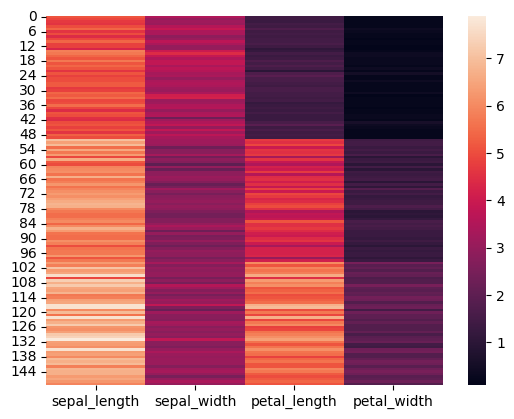

In [11]:
sns.heatmap(x)
plt.show()

In [54]:
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=30)

In [55]:
sc=StandardScaler()
xtr=sc.fit_transform(xtr)
xte=sc.transform(xte)

lb=LabelEncoder()
ytr=lb.fit_transform(ytr)
yte=lb.transform(yte)

In [56]:
ytr

array([2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       0, 1, 2, 0, 2, 1, 2, 2, 0, 0])

In [57]:
xtr

array([[ 1.24398183,  0.06626518,  0.90646398,  1.15402546],
       [-0.4704476 , -1.52409921, -0.06833123, -0.30788779],
       [ 1.12152258, -0.16092973,  0.96380488,  1.15402546],
       [ 0.26430787, -0.16092973,  0.61975951,  0.75532185],
       [ 2.22365578, -1.06970938,  1.76657741,  1.41982787],
       [ 1.24398183,  0.06626518,  0.7344413 ,  1.41982787],
       [-0.96028458, -1.29690429, -0.4697175 , -0.17498659],
       [ 0.6316856 ,  0.06626518,  0.96380488,  0.75532185],
       [ 0.26430787, -0.61531956,  0.10369145,  0.09081582],
       [ 1.61135956, -0.16092973,  1.13582757,  0.48951944],
       [ 1.12152258,  0.2934601 ,  1.19316846,  1.41982787],
       [ 0.6316856 , -0.61531956,  1.02114578,  1.15402546],
       [-0.10306986,  2.1110194 , -1.50185361, -1.37109743],
       [ 0.38676711, -1.97848903,  0.39039593,  0.35661823],
       [ 0.6316856 , -0.84251447,  0.84912309,  0.88822305],
       [-0.83782533, -0.84251447,  0.04635056,  0.22371703],
       [-0.34798835, -0.

In [62]:
clf=RandomForestClassifier(n_estimators=100,max_depth=6,)
model=clf.fit(xtr,ytr)

In [63]:
pred=model.predict(xte)

In [64]:
accuray=accuracy_score(yte,pred)

In [65]:
print(accuray)

0.9333333333333333


In [66]:
model.feature_importances_

array([0.09266914, 0.02633154, 0.36710986, 0.51388946])

In [69]:
importances=clf.feature_importances_

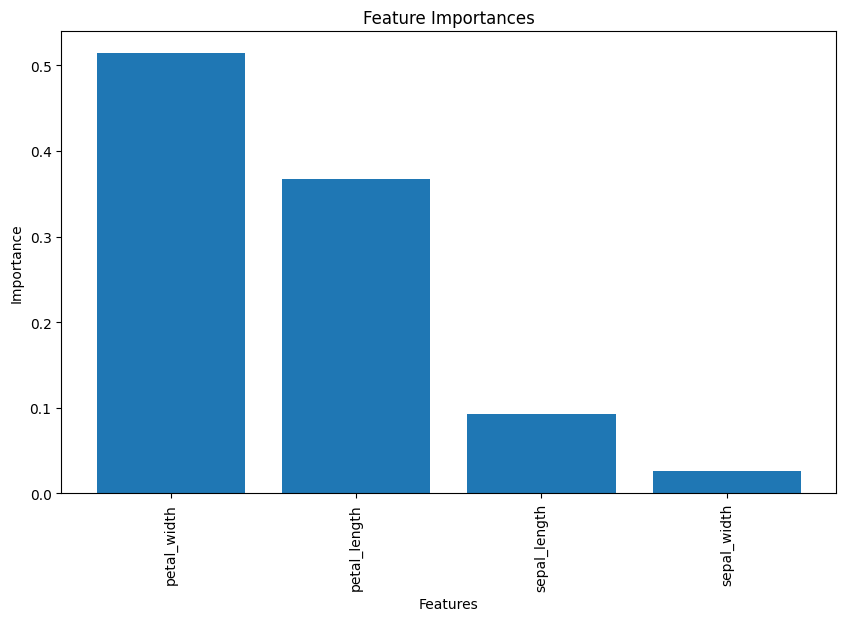

In [72]:

indices = np.argsort(importances)[::-1]


names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")

plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()